In [25]:
import numpy as np

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import sys
import pickle
import os
import pdb
 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

%load_ext autoreload
%autoreload 2

sns.set()

sys.path.append("../workstation/")

from utils.trajectory_utils import truncate_expert_data
from utils import data_utils
from utils.control_loop_data import ControlLoopData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def plot_2d_array(data, figsize=(6, 6), legend_label='', title='',
                  xlabel='', ylabel='', colors=[], marker='o',
                  linestyle='', linewidth=1.0, markersize=1):
    '''Plt a 2D numpy array.'''
    if len(colors) == 0:
        colors = sns.color_palette(n_colors=data.shape[1])
    
    if type(legend_label) is str and len(legend_label) == 0:
        legend_label = [str(i) for i in range(data.shape[1])]
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, title=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    lines = []
    for i in range(data.shape[1]):
        l = ax.plot(data[:, i], color=colors[i], label=legend_label[i],
                     marker=marker, linestyle='dashed',
                     linewidth=linewidth, markersize=markersize)
        lines.append(l[0])
    plt.legend(handles=lines)
    plt.show()

[(0, 3982), (3982, 7976), (7976, 11977), (11977, 13164), (13164, 14362), (14362, 15564), (15564, 16763), (16763, 17964), (17964, 19163), (19163, 20363), (20363, 21565), (21565, 22767), (22767, 26767), (26767, 27966), (27966, 29162), (29162, 30360), (30360, 31562), (31562, 32756), (32756, 33957), (33957, 35159), (35159, 36360), (36360, 37562), (37562, 39555), (39555, 41557), (41557, 42392), (42392, 43594), (43594, 44796), (44796, 45992), (45992, 47186), (47186, 48388), (48388, 49590), (49590, 50786), (50786, 51984), (51984, 53186), (53186, 73552), (73552, 77552), (77552, 81548), (81548, 83540), (83540, 85542), (85542, 86395), (86395, 87591), (87591, 88793), (88793, 89995), (89995, 91192), (91192, 92394), (92394, 93596), (93596, 94791), (94791, 95993), (95993, 97195), (97195, 117589), (117589, 121584), (121584, 125582), (125582, 127584), (127584, 129586), (129586, 131566), (131566, 132766), (132766, 133968)]
Skill: 0, time: 3.982
Skill: 1, time: 3.994
Skill: 2, time: 4.001
Skill: 3, time

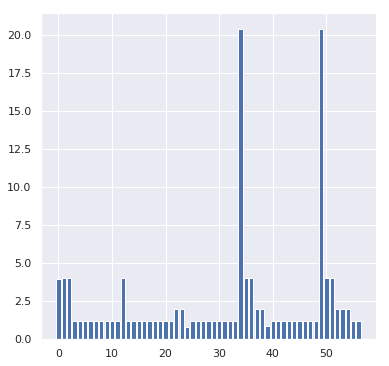

--Return--
> <ipython-input-27-e5dc9e78dafa>(16)<module>()->None
-> pdb.set_trace()
(Pdb) control_loop_data.robot_data_by_skill_info_dict.keys()
dict_keys(['info: Will execute skill: 42 meta_skill: 0 desc: move_onto_cucumber_to_cut_1 type: ArmRelativeMotionToContactWithDefaultSensorSkill  id: 42', 'info: Will execute skill: 45 meta_skill: 0 desc: random_exploration_on_cucumber_1_x_3_pos_0.005_time_0.200 type: ArmRelativeMotionToContactWithDefaultSensorSkill  id: 45', 'info: Will execute skill: 48 meta_skill: 0 desc: random_exploration_on_cucumber_1_y_3_pos_0.005_time_0.200 type: ArmRelativeMotionToContactWithDefaultSensorSkill  id: 48', 'info: Will execute skill: 51 meta_skill: 0 desc: random_exploration_on_cucumber_1_z_3_pos_0.005_time_0.200 type: ArmRelativeMotionToContactWithDefaultSensorSkill  id: 51', 'info: Will execute skill: 11 meta_skill: 0 desc: random_exploration_on_cutting_board_z_3_pos_0.005_time_0.200 type: ArmRelativeMotionToContactWithDefaultSensorSkill  id: 11', 'info:

(Pdb) quit()


BdbQuit: 

In [27]:
control_loop_data_path = '/media/hdd/mohit/mohit_data_exploration_4/control_loop_data.txt'
control_loop_data_path = '/media/hdd/mohit/mohit_data_exploration_jan_25_3/control_loop_data.txt'
csv_data = data_utils.read_data_as_csv(control_loop_data_path, non_csv_rows_prefix='info')

control_loop_data = ControlLoopData(csv_data) 
print(control_loop_data.skill_time_as_tuple_list)

skill_times = control_loop_data.get_duration_for_each_skill()
skill_times_in_seconds = [t/1000.0 for t in skill_times] 
for i, t in enumerate(skill_times_in_seconds):
    print("Skill: {}, time: {:.3f}".format(i, t))
    
matplotlib.pyplot.bar(range(len(skill_times_in_seconds)), skill_times_in_seconds)
plt.show()

pdb.set_trace()

# plt.plot(control_loop_data.data_as_ord_dict['q'][:, :])
# plt.show()
plot_2d_array(control_loop_data.data_as_ord_dict['q'], title='q',
              legend_label=['0', '1', '2', '3', '4', '5', '6'],
              figsize=(8, 8))
plot_2d_array(control_loop_data.data_as_ord_dict['dq'], figsize=(8, 8), title='dq')

type(csv_data)

# Plot different properties for all of the skills?
